In [1]:
import pandas as pd

In [4]:
# read the file validated_top_10_clearnsed.csv and split into train and test set
df = pd.read_csv('validated_top10_cleaned.csv')
# df = df.drop(columns=['Unnamed: 0'])

train = df.iloc[:int(0.8*len(df))]
test = df.iloc[int(0.8*len(df)):]

In [35]:
df = test

In [36]:
df.head()

,path,accents,sentence
2639,common_voice_en_37887096.mp3,"Southern African (South Africa, Zimbabwe, Nami...",Before all these predictions a battle was to t...
2640,common_voice_en_37887106.mp3,"Southern African (South Africa, Zimbabwe, Nami...",Purble Shop is a codebreaker game
2641,common_voice_en_37887128.mp3,"Southern African (South Africa, Zimbabwe, Nami...",The walking path around the lake is long
2642,common_voice_en_37887979.mp3,"Southern African (South Africa, Zimbabwe, Nami...",It is certain that Megara never recovered its ...
2643,common_voice_en_37888050.mp3,"Southern African (South Africa, Zimbabwe, Nami...",Consumption of energy and raw materials was ex...


In [37]:
# drop column accent
df = df.drop(columns=['accents'])


In [58]:
# add prefix clips/ to all paths in the paths column of df
df = pd.read_csv("test.csv")
df['path'] = 'files/' + df['path']
df.head()

,path,sentence,duration
0,files/clips/common_voice_en_37887096.mp3,before all these predictions a battle was to t...,5.580
1,files/clips/common_voice_en_37887106.mp3,purble shop is a codebreaker game,4.356
2,files/clips/common_voice_en_37887128.mp3,the walking path around the lake is long,4.356
3,files/clips/common_voice_en_37887979.mp3,it is certain that megara never recovered its ...,7.380
4,files/clips/common_voice_en_37888050.mp3,consumption of energy and raw materials was ex...,7.776


In [59]:
#write into a new csv file
df.to_csv('test.csv', index=False)

In [39]:
from pydub import AudioSegment

for index, row in df.iterrows():
    audio_path = row['path']  # Get the path to the audio file
    
    # check if the file exists
    try:
        open(audio_path)
    except:
        print(f'File {audio_path} does not exist')
        df = df.drop(index)
        continue

    # Load the audio file using pydub
    audio = AudioSegment.from_file(audio_path)
    
    # Get the duration of the audio file in seconds and convert it to float
    duration_seconds = len(audio) / 1000.0
    
    # Update the 'duration' column in the DataFrame
    df.at[index, 'duration'] = duration_seconds

In [40]:
df.head()

,path,sentence,duration
2639,clips/common_voice_en_37887096.mp3,Before all these predictions a battle was to t...,5.580
2640,clips/common_voice_en_37887106.mp3,Purble Shop is a codebreaker game,4.356
2641,clips/common_voice_en_37887128.mp3,The walking path around the lake is long,4.356
2642,clips/common_voice_en_37887979.mp3,It is certain that Megara never recovered its ...,7.380
2643,clips/common_voice_en_37888050.mp3,Consumption of energy and raw materials was ex...,7.776


In [41]:
# export df to a new cSV file named test.csv
df.to_csv('test.csv', index=False)

In [45]:
# read train.csv file, convert all the words to lower case and save it to a new file named train.csv
df = pd.read_csv('test.csv')
df['sentence'] = df['sentence'].str.lower()
df.to_csv('test.csv', index=False)

In [50]:
# create a file called vocab.txt and write the unique words in the 'sentence' column of df to it
df = pd.read_csv('train.csv')
vocab = set()
for sentence in df['sentence']:
    words = sentence.split()
    vocab.update(words)


In [52]:
df = pd.read_csv('test.csv')
for sentence in df['sentence']:
    words = sentence.split()
    vocab.update(words)

In [53]:
len(vocab)

8398

In [55]:
# create a file called vocab.txt and write the word in the vocab into that file
with open('vocab.txt', 'w') as f:
    for word in vocab:
        f.write(word + '\n')

In [61]:
df = pd.read_csv('test.csv')
# change the column 'sentence' to text
df = df.rename(columns={'sentence': 'text'})
df.to_csv('test.csv', index=False)

In [3]:
# open file called voacb.txt and add a tocken number to each word
with open('vocab.txt', 'r') as f:
    vocab = f.read().splitlines()

vocab_to_int = {word: i for i, word in enumerate(vocab, 1)}

# write the vocab_to_int to a file called vocab_to_int.txt

with open('vocab_to_int.txt', 'w') as f:
    for word, i in vocab_to_int.items():
        f.write(f'{word} {i+1}\n')
        

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('test.csv')

# keep only first 1/10 of the rows
df = df.iloc[:int(len(df)/10)]
#write into a new csv file
df.to_csv('testMini.csv', index=False)

Text(0.5, 1.0, 'Training Loss')

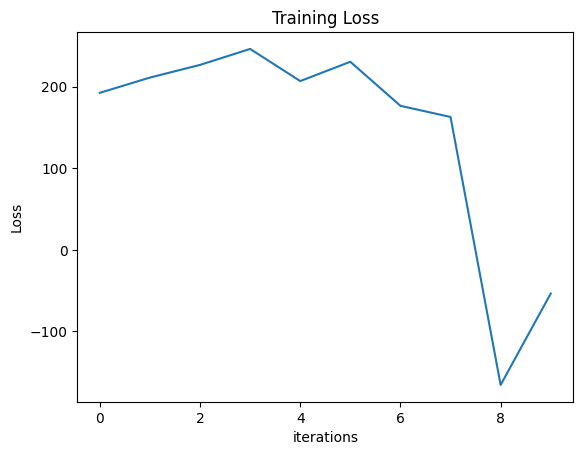

In [2]:
losses = [192.46, 211.16, 226.68, 246.27, 206.87, 230.52, 176.55, 162.85, -165.55, -53.52]
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Training Loss')


Text(0.5, 1.0, 'Training Loss')

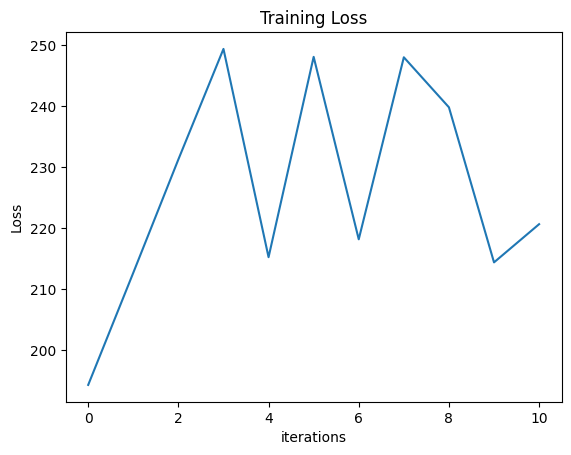

In [3]:
losses = [194.26, 212.65, 231.23, 249.34, 215.20, 248.04, 218.13, 247.97, 239.77, 214.35, 220.61]
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

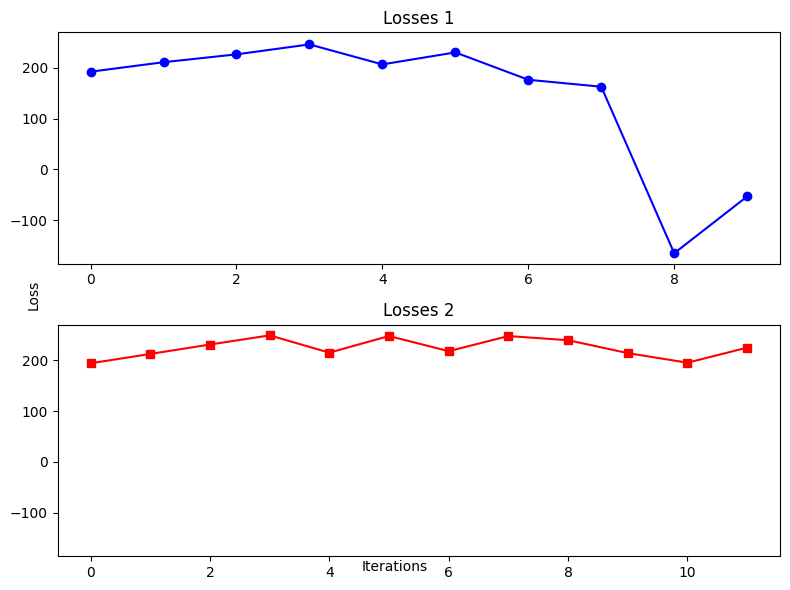

In [5]:
import matplotlib.pyplot as plt

# Define the two lists of losses
losses1 = [192.46, 211.16, 226.68, 246.27, 206.87, 230.52, 176.55, 162.85, -165.55, -53.52]
losses2 = [194.26, 212.65, 231.23, 249.34, 215.20, 248.04, 218.13, 247.97, 239.77, 214.35, 195.4, 225.11]

# Create two subplots with the same y-axis scale
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharey=True)

# Plot the first list of losses on the first subplot
axs[0].plot(losses1, marker='o', color='blue')
axs[0].set_title('Losses 1')

# Plot the second list of losses on the second subplot
axs[1].plot(losses2, marker='s', color='red')
axs[1].set_title('Losses 2')

# Set common labels
fig.text(0.5, 0.04, 'Iterations', ha='center')
fig.text(0.04, 0.5, 'Loss', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
